1) Extract data from CSV file
2) Transform/Manipulate Data
3) Load Data into SQL Database (Python has inbuilt SQL module — ‘sqlite3’)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# for full display of output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd

crypto_df = pd.read_csv('crypto-markets.csv')
crypto_df.head()

,slug,asset,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,target-coin,TGT,Target Coin,29-09-2017,607,0.028961,0.054766,0.028961,0.041777,69996,0.0,0.4966,0.03
1,target-coin,TGT,Target Coin,30-09-2017,607,0.041783,0.046196,0.031435,0.031744,5725,0.0,0.0209,0.01
2,target-coin,TGT,Target Coin,01-10-2017,607,0.031761,0.035957,0.021040,0.028385,5012,0.0,0.4924,0.01
3,target-coin,TGT,Target Coin,02-10-2017,607,0.028375,0.054595,0.020417,0.022525,8010,0.0,0.0617,0.03
4,target-coin,TGT,Target Coin,03-10-2017,607,0.022527,0.032225,0.020211,0.020359,1787,0.0,0.0123,0.01


About the Data:
1) This is cryptocurrencies data
2) Contains crypto token name, its open, close, high and low price on certain dates and some other columns
3) These prices are in USD and we want to save this price into GBP currency (Great Britain Pound)

Tasks:
4) The other columns are irrelevant, hence drop those
5) Check for any Null or blank values
6) Transform: convert the price of BTC, ETH , XRP and LTC cryptocurrency only into GBP from USD



# EDA - Exploratory Data Analysis

In [4]:
# View data
crypto_df

,slug,asset,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,target-coin,TGT,Target Coin,29-09-2017,607,0.028961,0.054766,0.028961,0.041777,69996,0.0,0.4966,0.03
1,target-coin,TGT,Target Coin,30-09-2017,607,0.041783,0.046196,0.031435,0.031744,5725,0.0,0.0209,0.01
2,target-coin,TGT,Target Coin,01-10-2017,607,0.031761,0.035957,0.021040,0.028385,5012,0.0,0.4924,0.01
3,target-coin,TGT,Target Coin,02-10-2017,607,0.028375,0.054595,0.020417,0.022525,8010,0.0,0.0617,0.03
4,target-coin,TGT,Target Coin,03-10-2017,607,0.022527,0.032225,0.020211,0.020359,1787,0.0,0.0123,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,litecoin,LTC,Litecoin,09-08-2013,6,2.710000,2.760000,2.660000,2.680000,0,54639500.0,0.2000,0.10
1583,litecoin,LTC,Litecoin,10-08-2013,6,2.690000,2.710000,2.560000,2.560000,0,54201200.0,0.0000,0.15
1584,litecoin,LTC,Litecoin,11-08-2013,6,2.550000,2.720000,2.530000,2.690000,0,51564700.0,0.8421,0.19
1585,litecoin,LTC,Litecoin,12-08-2013,6,2.690000,2.720000,2.580000,2.650000,0,54534200.0,0.5000,0.14


In [5]:
# Data Types
crypto_df.dtypes

# Data Types, alongwith additional info
crypto_df.info()


slug            object
asset           object
name            object
date            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume           int64
market         float64
close_ratio    float64
spread         float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   slug         1587 non-null   object 
 1   asset        1587 non-null   object 
 2   name         1587 non-null   object 
 3   date         1587 non-null   object 
 4   ranknow      1587 non-null   int64  
 5   open         1587 non-null   float64
 6   high         1587 non-null   float64
 7   low          1587 non-null   float64
 8   close        1587 non-null   float64
 9   volume       1587 non-null   int64  
 10  market       1587 non-null   float64
 11  close_ratio  1587 non-null   float64
 12  spread       1587 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 161.3+ KB


In [6]:
# Shape of data (size)
crypto_df.shape

(1587, 13)

In [7]:
# Describe the data (basic summary of data)
crypto_df.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1.587000e+03,1.587000e+03,1587.000000,1587.000000
mean,279.370510,102.347029,108.061266,96.541671,103.119721,1.805186e+07,9.077853e+08,0.508461,11.519326
std,295.479265,225.374727,239.445390,209.694318,226.479862,5.769504e+07,1.901148e+09,0.306725,37.379683
min,1.000000,0.003082,0.003162,0.002875,0.003092,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,6.000000,0.015166,0.018374,0.012502,0.015114,0.000000e+00,1.121655e+07,0.245550,0.000000
50%,13.000000,0.559072,0.599138,0.487651,0.564041,1.412500e+04,4.984250e+07,0.505600,0.080000
75%,605.000000,115.810000,121.695000,110.900000,116.450000,4.483670e+05,1.224325e+09,0.786400,5.875000
max,609.000000,1555.590000,1642.220000,1371.390000,1550.850000,8.168720e+08,1.361470e+10,1.000000,588.080000


<Figure size 1440x720 with 0 Axes>

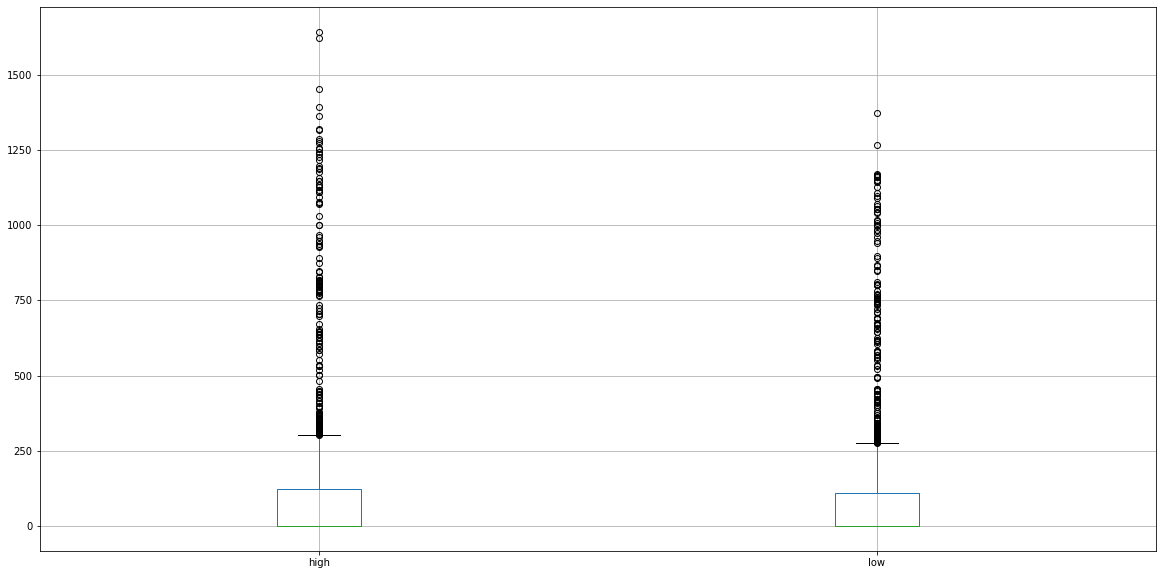

In [8]:
# Outliars
plt.figure(figsize=(20,10))
# crypto_df.boxplot()
crypto_df.boxplot(column=['high','low'])


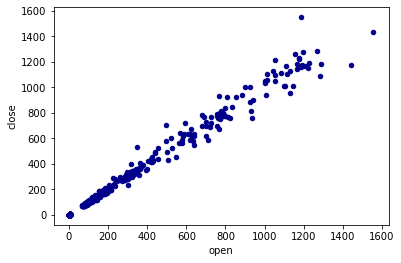

In [9]:
# scatter plot using coordinates from the values in a DataFrame’s columns

ax1 = crypto_df.plot.scatter(x='open',y='close',c='DarkBlue')

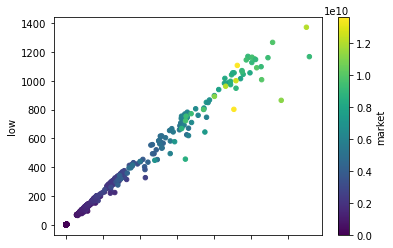

In [10]:
# add 3rd column data, for the color determined by that column (market).

ax2 = crypto_df.plot.scatter(x='high',y='low',c='market',colormap='viridis')

In [ ]:
# To get comprehensive details of function plt.scatter
plt.scatter?

In [11]:
# Correlation matrix and heatmap
corrMatrix = crypto_df.corr()
print (corrMatrix)

              ranknow      open      high       low     close    volume  \
ranknow      1.000000 -0.413074 -0.410428 -0.418948 -0.414248 -0.279998   
open        -0.413074  1.000000  0.997227  0.995177  0.994919  0.783433   
high        -0.410428  0.997227  1.000000  0.994900  0.998306  0.804937   
low         -0.418948  0.995177  0.994900  1.000000  0.997043  0.779828   
close       -0.414248  0.994919  0.998306  0.997043  1.000000  0.797962   
volume      -0.279998  0.783433  0.804937  0.779828  0.797962  1.000000   
market      -0.430499  0.980903  0.979252  0.975610  0.977815  0.700197   
close_ratio -0.084148  0.059703  0.069496  0.068143  0.082389  0.047255   
spread      -0.278873  0.805212  0.824527  0.763252  0.801654  0.781521   

               market  close_ratio    spread  
ranknow     -0.430499    -0.084148 -0.278873  
open         0.980903     0.059703  0.805212  
high         0.979252     0.069496  0.824527  
low          0.975610     0.068143  0.763252  
close        0

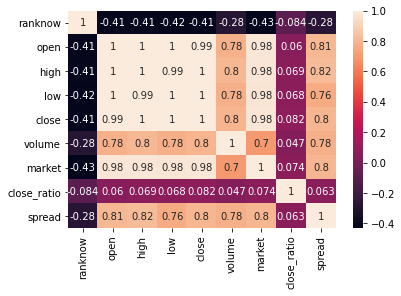

In [12]:
import seaborn as sn
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [13]:
# To get comprehensive details of function sn.heatmap
sn.heatmap?

In [14]:
# Only for selected columns

df1 = pd.DataFrame(crypto_df,columns=['high','low','open','close'])



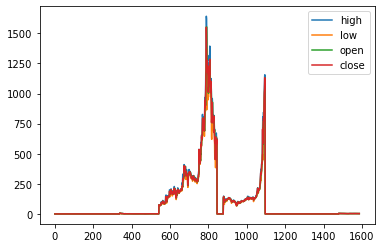

In [15]:
df1.plot()

           high       low      open     close
high   1.000000  0.994900  0.997227  0.998306
low    0.994900  1.000000  0.995177  0.997043
open   0.997227  0.995177  1.000000  0.994919
close  0.998306  0.997043  0.994919  1.000000


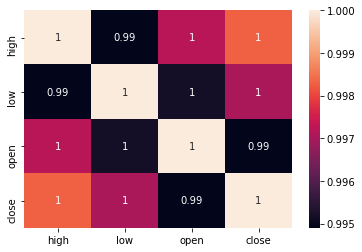

In [16]:
# Compute pairwise correlation of columns, excluding NA/null values.

corrMatrix = df1.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# To get comprehensive details of function df.corr
df.corr?

# Transform/Manipulate Data
Transform: convert the price of BTC, ETH , XRP and LTC cryptocurrency only into GBP from USD

In [17]:
# To convert dataframe object data type to date

crypto_df['date'] = pd.to_datetime(crypto_df['date'])
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   slug         1587 non-null   object        
 1   asset        1587 non-null   object        
 2   name         1587 non-null   object        
 3   date         1587 non-null   datetime64[ns]
 4   ranknow      1587 non-null   int64         
 5   open         1587 non-null   float64       
 6   high         1587 non-null   float64       
 7   low          1587 non-null   float64       
 8   close        1587 non-null   float64       
 9   volume       1587 non-null   int64         
 10  market       1587 non-null   float64       
 11  close_ratio  1587 non-null   float64       
 12  spread       1587 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(3)
memory usage: 161.3+ KB


In [ ]:
crypto_df.head()

In [18]:
# To get day from date
crypto_df['day'] = crypto_df['date'].dt.day

# To get month from date
crypto_df['month'] = crypto_df['date'].dt.month

# To get year from date
crypto_df['year'] = crypto_df['date'].dt.year

# To get week from date
crypto_df['week'] = crypto_df['date'].dt.week

# To get quarter from date
crypto_df['quarter'] = crypto_df['date'].dt.quarter

crypto_df.head()

,slug,asset,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,day,month,year,week,quarter
0,target-coin,TGT,Target Coin,2017-09-29,607,0.028961,0.054766,0.028961,0.041777,69996,0.0,0.4966,0.03,29,9,2017,39,3
1,target-coin,TGT,Target Coin,2017-09-30,607,0.041783,0.046196,0.031435,0.031744,5725,0.0,0.0209,0.01,30,9,2017,39,3
2,target-coin,TGT,Target Coin,2017-01-10,607,0.031761,0.035957,0.021040,0.028385,5012,0.0,0.4924,0.01,10,1,2017,2,1
3,target-coin,TGT,Target Coin,2017-02-10,607,0.028375,0.054595,0.020417,0.022525,8010,0.0,0.0617,0.03,10,2,2017,6,1
4,target-coin,TGT,Target Coin,2017-03-10,607,0.022527,0.032225,0.020211,0.020359,1787,0.0,0.0123,0.01,10,3,2017,10,1


In [19]:
assetsCode = ['BTC','ETH','XRP','LTC']

# converting open, close, high and low price of crypto currencies into GBP values since current price is in Dollars
# if currency belong to this list ['BTC','ETH','XRP','LTC']

print(crypto_df[['open','asset']])
                
crypto_df['open'] = crypto_df[['open', 'asset']].apply(lambda x: (float(x[0]) * 0.80) 
                                                       if x[1] in assetsCode else np.nan, axis=1)

crypto_df['close'] = crypto_df[['close', 'asset']].apply(lambda x: (float(x[0]) * 0.80) 
                                                         if x[1] in assetsCode else np.nan, axis=1)

crypto_df['high'] = crypto_df[['high', 'asset']].apply(lambda x: (float(x[0]) * 0.80) 
                                                       if x[1] in assetsCode else np.nan, axis=1)

crypto_df['low'] = crypto_df[['low', 'asset']].apply(lambda x: (float(x[0]) * 0.80) 
                                                     if x[1] in assetsCode else np.nan, axis=1)

crypto_df

          open asset
0     0.028961   TGT
1     0.041783   TGT
2     0.031761   TGT
3     0.028375   TGT
4     0.022527   TGT
...        ...   ...
1582  2.710000   LTC
1583  2.690000   LTC
1584  2.550000   LTC
1585  2.690000   LTC
1586  2.660000   LTC

[1587 rows x 2 columns]


,slug,asset,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,day,month,year,week,quarter
0,target-coin,TGT,Target Coin,2017-09-29,607,NaN,NaN,NaN,NaN,69996,0.0,0.4966,0.03,29,9,2017,39,3
1,target-coin,TGT,Target Coin,2017-09-30,607,NaN,NaN,NaN,NaN,5725,0.0,0.0209,0.01,30,9,2017,39,3
2,target-coin,TGT,Target Coin,2017-01-10,607,NaN,NaN,NaN,NaN,5012,0.0,0.4924,0.01,10,1,2017,2,1
3,target-coin,TGT,Target Coin,2017-02-10,607,NaN,NaN,NaN,NaN,8010,0.0,0.0617,0.03,10,2,2017,6,1
4,target-coin,TGT,Target Coin,2017-03-10,607,NaN,NaN,NaN,NaN,1787,0.0,0.0123,0.01,10,3,2017,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,litecoin,LTC,Litecoin,2013-09-08,6,2.168,2.208,2.128,2.144,0,54639500.0,0.2000,0.10,8,9,2013,36,3
1583,litecoin,LTC,Litecoin,2013-10-08,6,2.152,2.168,2.048,2.048,0,54201200.0,0.0000,0.15,8,10,2013,41,4
1584,litecoin,LTC,Litecoin,2013-11-08,6,2.040,2.176,2.024,2.152,0,51564700.0,0.8421,0.19,8,11,2013,45,4
1585,litecoin,LTC,Litecoin,2013-12-08,6,2.152,2.176,2.064,2.120,0,54534200.0,0.5000,0.14,8,12,2013,49,4


# Selecting Data for Analysis

In [22]:
# dropping rows with null values by asset column
crypto_df.dropna(inplace=True)
crypto_df

,slug,asset,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,day,month,year,week,quarter
878,bitcoin,BTC,Bitcoin,2013-04-28,1,108.240,108.784,105.680,107.368,0,1.500520e+09,0.5438,3.88,28,4,2013,17,2
879,bitcoin,BTC,Bitcoin,2013-04-29,1,107.552,117.992,107.200,115.632,0,1.491160e+09,0.7813,13.49,29,4,2013,18,2
880,bitcoin,BTC,Bitcoin,2013-04-30,1,115.200,117.544,107.240,111.200,0,1.597780e+09,0.3843,12.88,30,4,2013,18,2
881,bitcoin,BTC,Bitcoin,2013-01-05,1,111.200,111.912,86.176,93.592,0,1.542820e+09,0.2882,32.17,5,1,2013,1,1
882,bitcoin,BTC,Bitcoin,2013-02-05,1,93.104,100.480,73.824,84.168,0,1.292190e+09,0.3881,33.32,5,2,2013,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,litecoin,LTC,Litecoin,2013-09-08,6,2.168,2.208,2.128,2.144,0,5.463950e+07,0.2000,0.10,8,9,2013,36,3
1583,litecoin,LTC,Litecoin,2013-10-08,6,2.152,2.168,2.048,2.048,0,5.420120e+07,0.0000,0.15,8,10,2013,41,4
1584,litecoin,LTC,Litecoin,2013-11-08,6,2.040,2.176,2.024,2.152,0,5.156470e+07,0.8421,0.19,8,11,2013,45,4
1585,litecoin,LTC,Litecoin,2013-12-08,6,2.152,2.176,2.064,2.120,0,5.453420e+07,0.5000,0.14,8,12,2013,49,4


In [23]:
# reset the data frame index
crypto_df.reset_index(drop=True ,inplace=True)
crypto_df

,slug,asset,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,day,month,year,week,quarter
0,bitcoin,BTC,Bitcoin,2013-04-28,1,108.240,108.784,105.680,107.368,0,1.500520e+09,0.5438,3.88,28,4,2013,17,2
1,bitcoin,BTC,Bitcoin,2013-04-29,1,107.552,117.992,107.200,115.632,0,1.491160e+09,0.7813,13.49,29,4,2013,18,2
2,bitcoin,BTC,Bitcoin,2013-04-30,1,115.200,117.544,107.240,111.200,0,1.597780e+09,0.3843,12.88,30,4,2013,18,2
3,bitcoin,BTC,Bitcoin,2013-01-05,1,111.200,111.912,86.176,93.592,0,1.542820e+09,0.2882,32.17,5,1,2013,1,1
4,bitcoin,BTC,Bitcoin,2013-02-05,1,93.104,100.480,73.824,84.168,0,1.292190e+09,0.3881,33.32,5,2,2013,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,litecoin,LTC,Litecoin,2013-09-08,6,2.168,2.208,2.128,2.144,0,5.463950e+07,0.2000,0.10,8,9,2013,36,3
491,litecoin,LTC,Litecoin,2013-10-08,6,2.152,2.168,2.048,2.048,0,5.420120e+07,0.0000,0.15,8,10,2013,41,4
492,litecoin,LTC,Litecoin,2013-11-08,6,2.040,2.176,2.024,2.152,0,5.156470e+07,0.8421,0.19,8,11,2013,45,4
493,litecoin,LTC,Litecoin,2013-12-08,6,2.152,2.176,2.064,2.120,0,5.453420e+07,0.5000,0.14,8,12,2013,49,4


In [24]:
# To drop columns other than, asset, name, date, open, high, low and close.

crypto_df.drop(labels=['slug', 'ranknow', 'volume', 'market', 'close_ratio', 'spread'], inplace=True, axis=1)
crypto_df.head()

,asset,name,date,open,high,low,close,day,month,year,week,quarter
0,BTC,Bitcoin,2013-04-28,108.240,108.784,105.680,107.368,28,4,2013,17,2
1,BTC,Bitcoin,2013-04-29,107.552,117.992,107.200,115.632,29,4,2013,18,2
2,BTC,Bitcoin,2013-04-30,115.200,117.544,107.240,111.200,30,4,2013,18,2
3,BTC,Bitcoin,2013-01-05,111.200,111.912,86.176,93.592,5,1,2013,1,1
4,BTC,Bitcoin,2013-02-05,93.104,100.480,73.824,84.168,5,2,2013,6,1


In [ ]:
# Select cases of specific month
maycrypto_df = crypto_df[pd.to_datetime(crypto_df['date']).dt.month == 5]
maycrypto_df.head()

# Load Data into SQL Database 
Python does come along with an in-built SQL module ‘sqlite3’ for Python3, 
so we don't need to download any external library.

In [ ]:
import sqlite3

# connect function opens a connection to the SQLite database file, 
conn = sqlite3.connect('session.db')
print(conn)
# Output: <sqlite3.Connection object at 0x0000015A87671730>

# Drop a table name Crypto if it exists already
try:
    conn.execute('DROP TABLE IF EXISTS `Crypto` ')
except Exception as e:
    raise(e)
finally:
    print('Table dropped')

    
# Create a new Table named as Crypto
try:
    conn.execute('''
         CREATE TABLE Crypto
         (ID         INTEGER PRIMARY KEY,
         NAME        TEXT    NOT NULL,
         Date        datetime,
         Open        Float DEFAULT 0,
         High        Float DEFAULT 0,
         Low         Float DEFAULT 0,
         Close       Float DEFAULT 0);''')
    print ("Table created successfully");
except Exception as e:
    print(str(e))
    print('Table Creation Failed!!!!!')
finally:
    conn.close() # this closes the database connection